In [30]:
#파이토치 기본 라이브러리
import torch

# 이미지와 관련된 파이토치 라이브러리
import torchvision

#이미지 전처리 기능들을 제공하는 라이브러리
import torchvision.transforms as tr

#데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
from torch.utils.data import DataLoader, Dataset
import numpy as p
import matplotlib.pyplot as plt

In [31]:

# tr.Compose 내에 원하는 전처리를 차례대로 넣어주면 된다.

transf = tr.Compose([tr.Resize(16),tr.ToTensor()]) # 16x16으로 이미지 크기 변환 후 텐서 타입으로 변환한다.

# torchvision.datasets에서 제공하는 CIFAR10 데이터를 불러온다.
# root에는 다운로드 받을 경로를 입력한다.
# train=Ture이면 학습 데이터를 불러오고 train=False이면 테스트 데이터를 불러온다.
# 미리 선언한 전처리를 사용하기 위해 transform=transf을 입력한다.

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)


torch.Size([3, 16, 16])
torch.Size([50, 3, 16, 16])


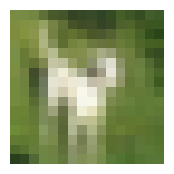

In [36]:
# 일반적으로 데이터셋은 이미지와 라벨이 동시에 들어있는 튜플(tuple) 형태다.
# (이미지, 라벨)
# trainset[0]은 학습 데이터의 첫 번째 데이터로
# 이미지 한 장과 라벨 숫자 하나가 저장되어 있다.
# 즉, trainset[0][0]은 이미지이며 trainset[0][1]은 라벨이다.

print(trainset[0][0].size())

# 현재 이미지 사이즈는 3x16x16이다. 여기서 3은 채널 수를 말하고
# 16x16은 이미지의 너비와 높이를 의미한다.
# 일반적인 컬러 사진은 RGB 이미지이기 때문에 채널이 3개 이고
# (너비)x(높이)x(채널 수)로 크기가 표현된다.

# 하지만 파이토치에서는 이미지 한 장이 (채널 수)x(너비)x(높이)으로
# 표현되니 유의하도록 한다.

# DataLoader는 데이터를 미니 배치 형태로 만들어 준다.
# 따라서 배치 사이즈 및 셔플 여부 등을 선택할 수 있다.
trainloader = DataLoader(trainset, batch_size=50, shuffle=True)
testloader = DataLoader(testset, batch_size=50, shuffle=False)

# 즉, batch_size=50, shuffle=True은
# 무작위로 데이터를 섞어 한 번 에 50개의 이미지를 묶은 배치로 제공하겠다는 의미다.

# len(trainloader)
# Output: 1000
#
# CIFAR10의 학습 이미지는 50000장이고 배치 사이즈가 50장이므로
# 1000은 배치의 개수가 된다.

# Output: torch.Size([50, 3, 16, 161)
#
# 배치 이미지를 간단히 확인하기 위해 파이썬에서 제공하는
# iter와 next 함수를 이용한다.
#
# 이를 통 해 trainloader의 첫 번째 배치를 불러올 수 있다.
# 1 배치 사이즈는 (배치 크기)×(채널 수)×(너비) (높이)를 의미한다.
# 즉, 배치 하나에 이미지 50개가 잘 들어가 있음을 알 수 있다.
#

# iter, next를 이용해 일부 데이터를 확인할 수 있다.
images, labels = next(iter(trainloader))
print(images.size())

# 일반적으로 학습 데이터는 4차원 형태로 모델에서 사용된다.
# (배치 크기)x(채널 수)x(너비)x(높이)
# torch.Size([50, 3, 16, 16])
oneshot = images[1].permute(1,2,0).numpy()
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()